In [170]:
import pandas as pd
import numpy as np

In [238]:
campaign = pd.read_csv('data/AMSCampaign.csv')
ad_group = pd.read_csv('data/AMSAdGroup.csv')
ad_group_details = pd.read_csv('data/AMSAdGroupDetail.csv')


In [172]:
#Add campaign ID to ad groups
ad_group_details = ad_group_details.join(ad_group.set_index('id'), on='ad_groups')
ad_group_details = ad_group_details.drop(['name'], axis=1)
ad_group_details = ad_group_details.join(campaign.set_index('id'), on='campaign')

# Exploring one product

In [261]:
def get_product_data(name, ads_data):
    product = ads_data[ads_data.asin == name]
    product = product.groupby(product.campaign)[
        'impressions', 
        'clicks', 
        'spend', 
        'sales', 
        'orders', 
        'units'].sum().reset_index()
    product['ROI'] = product.sales / product.spend
    product = product.join(campaign.set_index('id'), on='campaign').sort_values(by = 'ROI', ascending = False)
    product = product.drop(columns = ['currency'])
    return product

In [262]:
name = 'B002UVKMVY'

In [263]:
get_product_data('B002UVKMVY', ads_data)

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,campaign,impressions,clicks,spend,sales,orders,units,ROI,portfolio,name,type,attribution_period,targeting_type,bidding_strategy,start_date,end_date,daily_budget
1,1237,85195,1044,1253.09,12183.05,535,690,9.722406,4,CLW_BR_FoamingHandSanitizer,SP,14,Manual targeting,Dynamic bids - down only,10/29/17,NaN,200.0
2,1240,287362,980,1142.92,4093.57,187,205,3.581677,1,KIYWORD.SP.CS.002,SP,14,Manual targeting,Dynamic bids - down only,9/8/17,NaN,100.0
4,2042,153527,380,487.20,1724.48,89,99,3.539573,1,CLW_Cat_PrMix,SP,14,Manual targeting,Dynamic bids - down only,9/8/17,NaN,100.0
7,55306,23171,39,16.69,39.75,2,2,2.381666,11883,CLW_Cat_HandSani_SD,SP,14,NaN,Dynamic bids - up and down,NaN,NaN,NaN
3,1248,1902389,4610,7049.72,14890.73,710,792,2.112244,4,CLW_Cat_FoamingHandSanitizer,SP,14,Manual targeting,Dynamic bids - down only,2/6/18,NaN,50.0
0,1226,88156,170,139.65,246.23,11,12,1.763194,4,CLW_Comp_FoamingHandSanitizer,SP,14,Manual targeting,Dynamic bids - down only,2/6/18,NaN,100.0
5,3284,177,3,1.51,0.00,0,0,0.000000,4,CoronaVirus Test,SP,14,Manual targeting,Dynamic bids - down only,1/30/20,NaN,5.0
9,170656,17651,35,22.04,0.00,0,0,0.000000,11883,CLW_SD_Auto,SP,14,NaN,NaN,NaN,NaN,NaN
10,172418,6736,17,1.85,0.00,0,0,0.000000,11883,CLW_TargetAudiences/Views_2,SP,14,NaN,NaN,NaN,NaN,NaN
6,52171,0,0,0.00,0.00,0,0,NaN,4,KIYWORD.HandSaniFoaming 3 Pk Category,SP,14,NaN,Dynamic bids - down only,NaN,NaN,NaN


## campaigns effectiveness

In [173]:
def explore_product(name):
    product = ad_group_details[ad_group_details.asin == name]
    product = product.groupby(product.campaign)[
    'impressions', 
    'clicks', 
    'spend', 
    'sales', 
    'orders', 
    'units'].sum().reset_index()
    product['ROI'] = product.sales / product.spend
    product = product.join(campaign.set_index('id'), on='campaign').sort_values(by = 'ROI', ascending = False)
    product = product.drop(columns = ['currency'])
    return product

In [174]:
names = ad_group_details.asin.unique()
names


array(['B002UVKMVY', 'B01CJB7FIW', 'B00MH8YUOA', 'B004A7JDF2',
       'B001GIOW7M', 'B00AOJCERY', 'B00AOJCETC', 'B009V0ZMO4',
       'B001GIOW72', 'B001GIOW6I', 'B00834N20U', 'B001GIOW6S',
       'B000TU3EKY', 'B0041VGWGA', 'B001G7PQM8', 'B00AOJCEWE',
       'B001GIOW7C', 'B003X1BMEQ'], dtype=object)

In [175]:
name = names[5]
explore_product(name)

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,campaign,impressions,clicks,spend,sales,orders,units,ROI,portfolio,name,type,attribution_period,targeting_type,bidding_strategy,start_date,end_date,daily_budget
1,1235,25515,229,287.47,1031.13,98,179,3.586913,3,CLW_BR_DisfWipes,SP,14,Manual targeting,Dynamic bids - down only,11/28/18,NaN,120.5
0,1230,457834,208,86.00,204.33,34,49,2.375930,3,CLW_Comp_DisfWipes,SP,14,Manual targeting,Dynamic bids - down only,2/6/18,NaN,35.0
3,1251,9579,23,28.82,39.28,7,7,1.362942,1,KIYWORD.GreenWorks.Competitor,SP,14,Manual targeting,Dynamic bids - down only,7/18/18,NaN,100.0
2,1238,1585489,3110,5594.88,5007.14,739,975,0.894950,3,CLW_Cat_DisfWipes,SP,14,Manual targeting,Dynamic bids - up and down,11/28/18,NaN,300.0
4,55305,19951,27,19.46,16.36,2,4,0.840699,11883,CLW_Cat_HandWipes_SD,SP,14,NaN,Dynamic bids - up and down,NaN,NaN,NaN


## dynamics by day

In [176]:
product = ad_group_details[ad_group_details.asin == 'B01CJB7FIW']
product.T

,6,7,8,9,10,222,223,224,225,226,...,10284,10285,10286,10294,10295,10296,10297,10298,10299,10300
id,11,12,13,14,15,227,228,229,230,231,...,10289,10290,10291,10299,10300,10301,10302,10303,10304,10305
ad_groups,1,1,1,1,1,228,228,228,228,228,...,4920,4920,4920,4929,4929,4929,4929,4929,4929,4929
asin,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,...,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW
date,7/28/19,7/29/19,8/1/19,8/2/19,8/3/19,7/28/19,7/29/19,7/30/19,7/31/19,8/1/19,...,2/6/20,2/7/20,2/8/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20
impressions,1008,139,1930,1154,875,894,2413,1594,0,1666,...,5294,706,1850,565,200,39,215,384,16,55
clicks,2,0,4,1,0,3,3,5,0,1,...,26,1,17,5,1,0,11,7,1,1
CtR,0.001984,0,0.002073,0.000867,0,0.003356,0.001243,0.003137,NaN,0.0006,...,0.004911,0.001416,0.009189,0.00885,0.005,0,0.051163,0.018229,0.0625,0.018182
CpC,2.52,NaN,1.23,0.97,NaN,1.4,0.95,1.76,NaN,1.08,...,1.16,1.2,0.73,1.4,1.32,NaN,0.85,0.89,1.17,2.99
spend,5.03,0,4.93,0.97,0,4.2,2.84,8.81,0,1.08,...,30.13,1.2,12.33,7.02,1.32,0,9.32,6.22,1.17,2.99
ACoS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067942,NaN,NaN,...,0.353514,0.031546,NaN,NaN,0.012123,0,0.058995,0.027367,NaN,NaN


In [177]:
product.date = pd.to_datetime(product.date)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [179]:
X = product.groupby(product.date).sum().reset_index()

In [180]:
from fbprophet import Prophet
import plotly.express as px

In [181]:
fig = px.line(X, x='date', y='sales')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [182]:
df = product[['sales', 'date']].rename(columns={"sales": "y", "date": "ds"})
m = Prophet()

In [183]:
m.fit(df)
future = m.make_future_dataframe(periods=15)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


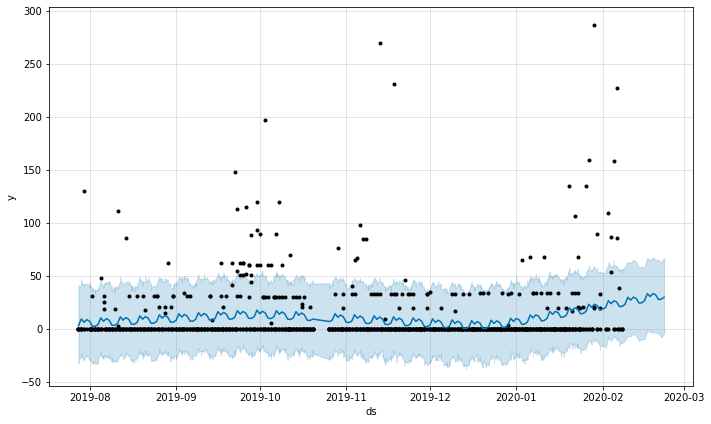

In [184]:
fig1 = m.plot(forecast)

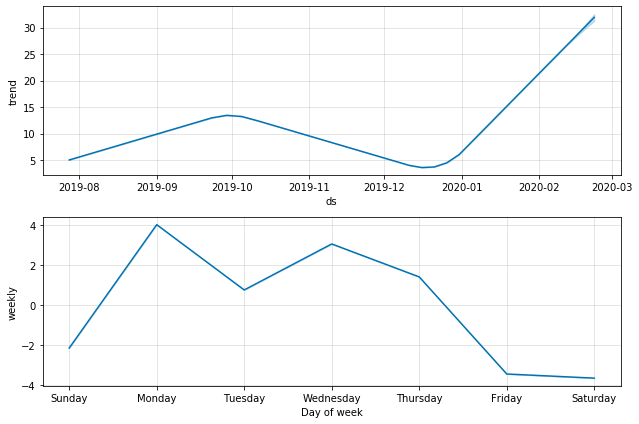

In [185]:
fig2 = m.plot_components(forecast)

## ML modeling (sales)

In [186]:
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl
import math


from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error


# print the JS visualization code to the notebook
shap.initjs()

In [187]:
product.T

,6,7,8,9,10,222,223,224,225,226,...,10284,10285,10286,10294,10295,10296,10297,10298,10299,10300
id,11,12,13,14,15,227,228,229,230,231,...,10289,10290,10291,10299,10300,10301,10302,10303,10304,10305
ad_groups,1,1,1,1,1,228,228,228,228,228,...,4920,4920,4920,4929,4929,4929,4929,4929,4929,4929
asin,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,...,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW,B01CJB7FIW
date,2019-07-28 00:00:00,2019-07-29 00:00:00,2019-08-01 00:00:00,2019-08-02 00:00:00,2019-08-03 00:00:00,2019-07-28 00:00:00,2019-07-29 00:00:00,2019-07-30 00:00:00,2019-07-31 00:00:00,2019-08-01 00:00:00,...,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00
impressions,1008,139,1930,1154,875,894,2413,1594,0,1666,...,5294,706,1850,565,200,39,215,384,16,55
clicks,2,0,4,1,0,3,3,5,0,1,...,26,1,17,5,1,0,11,7,1,1
CtR,0.001984,0,0.002073,0.000867,0,0.003356,0.001243,0.003137,NaN,0.0006,...,0.004911,0.001416,0.009189,0.00885,0.005,0,0.051163,0.018229,0.0625,0.018182
CpC,2.52,NaN,1.23,0.97,NaN,1.4,0.95,1.76,NaN,1.08,...,1.16,1.2,0.73,1.4,1.32,NaN,0.85,0.89,1.17,2.99
spend,5.03,0,4.93,0.97,0,4.2,2.84,8.81,0,1.08,...,30.13,1.2,12.33,7.02,1.32,0,9.32,6.22,1.17,2.99
ACoS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067942,NaN,NaN,...,0.353514,0.031546,NaN,NaN,0.012123,0,0.058995,0.027367,NaN,NaN


In [188]:
#data = product[['impressions', 'clicks', 'CtR', 'CpC', 'spend', 'RoAS', 'sales', 'orders']]
data = product[[
    'impressions', 
    'clicks', 
    'CtR', 'CpC', 'spend', 'sales', 'portfolio', 'daily_budget']]
data = data.dropna()

In [189]:
#getting dummies
# dums = pd.get_dummies(data.type)
# data = pd.concat([data, dums], axis = 1)
# data = data.drop(columns = 'type')

In [190]:
data

,impressions,clicks,CtR,CpC,spend,sales,portfolio,daily_budget
6,1008,2,0.001984,2.52,5.03,0.00,1,100.0
8,1930,4,0.002073,1.23,4.93,0.00,1,100.0
9,1154,1,0.000867,0.97,0.97,0.00,1,100.0
222,894,3,0.003356,1.40,4.20,0.00,4,50.0
223,2413,3,0.001243,0.95,2.84,0.00,4,50.0
...,...,...,...,...,...,...,...,...
10295,200,1,0.005000,1.32,1.32,108.88,4,200.0
10297,215,11,0.051163,0.85,9.32,157.98,4,200.0
10298,384,7,0.018229,0.89,6.22,227.28,4,200.0
10299,16,1,0.062500,1.17,1.17,0.00,4,200.0


In [191]:
data = data[data.sales != 0]

In [192]:
data.sales.mean()

51.302083333333314

In [193]:
y = data.sales
x = data.drop(columns = 'sales')

In [194]:
# create a train/test split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y)

In [195]:
rforest = RandomForestRegressor()
rforest.fit(Xtrain, ytrain)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [196]:
ypred = rforest.predict(Xtest)

In [197]:
y_test_pred = rforest.predict(Xtest)
rforest.score(Xtest, ytest)

-0.6143713409826854

In [198]:
math.sqrt(mean_squared_error(ypred, ytest))

57.029524057888544

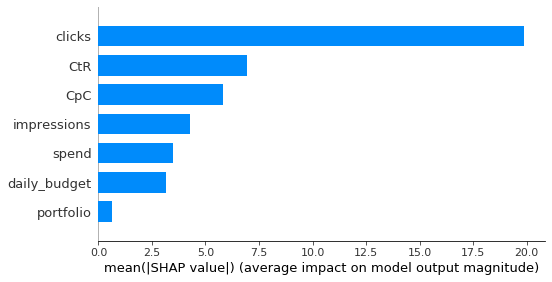

In [199]:
shap_values = shap.TreeExplainer(rforest).shap_values(Xtrain)
shap.summary_plot(shap_values, Xtrain, plot_type="bar")

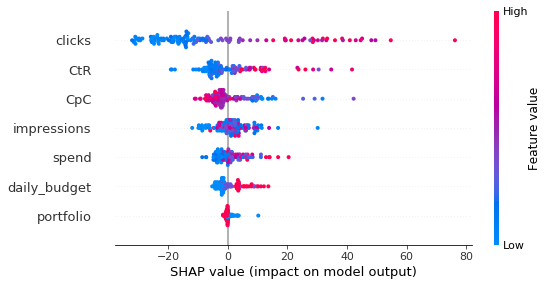

In [200]:
shap.summary_plot(shap_values, Xtrain)

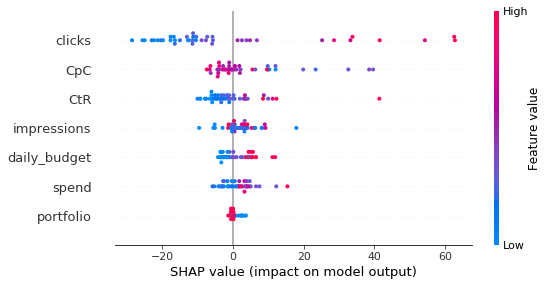

In [201]:
shap_values_test = shap.TreeExplainer(rforest).shap_values(Xtest)
shap.summary_plot(shap_values_test, Xtest)

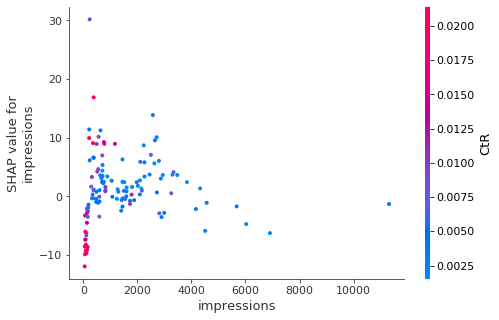

In [202]:
shap.dependence_plot('impressions', shap_values, Xtrain)

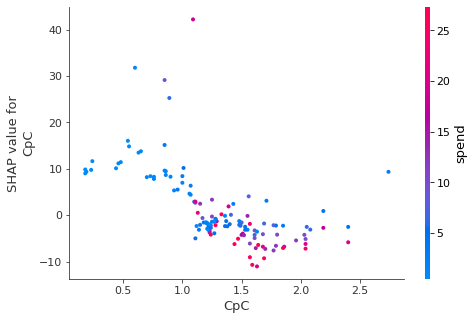

In [203]:
shap.dependence_plot('CpC', shap_values, Xtrain)

In [204]:
# plot the SHAP values for the 10th observation
explainer = shap.TreeExplainer(rforest, Xtrain)
shap.force_plot(explainer.expected_value, shap_values[10,:], Xtest.iloc[10,:])

In [205]:
shap.force_plot(explainer.expected_value, shap_values, Xtrain)

# Product sale funnel

In [206]:
data = product[['impressions', 'clicks', 'CtR', 'CpC', 'spend', 'RoAS', 'sales', 'orders']]

In [273]:
funnel = data[['impressions', 'clicks', 'spend', 'orders', 'sales']]
funnel = funnel.sum()
#funnel.impressions = funnel.impressions/100
funnel

impressions    583330.00
clicks           1817.00
spend            2440.74
orders            279.00
sales            8704.40
dtype: float64

In [274]:
from plotly import graph_objects as go

In [275]:
fig = go.Figure(go.Funnel(
    y = ["Impressions, K", "Clicks", "Orders"],
    x = [funnel.impressions, funnel.clicks, funnel.orders]))
fig.show()

# Looking into campaigns - sort by ROI for a product

In [66]:
B01CJB7FIW = ad_group_details[ad_group_details.asin == 'B01CJB7FIW']

In [67]:
B01CJB7FIW

,id,ad_groups,asin,date,impressions,clicks,CtR,CpC,spend,ACoS,...,portfolio,name,type,currency,attribution_period,targeting_type,bidding_strategy,start_date,end_date,daily_budget
6,11,1,B01CJB7FIW,7/28/19,1008,2,0.001984,2.52,5.03,NaN,...,1,KIYWORD.SP.CS.002,SP,USD,14,Manual targeting,Dynamic bids - down only,9/8/17,NaN,100.0
7,12,1,B01CJB7FIW,7/29/19,139,0,0.000000,NaN,0.00,NaN,...,1,KIYWORD.SP.CS.002,SP,USD,14,Manual targeting,Dynamic bids - down only,9/8/17,NaN,100.0
8,13,1,B01CJB7FIW,8/1/19,1930,4,0.002073,1.23,4.93,NaN,...,1,KIYWORD.SP.CS.002,SP,USD,14,Manual targeting,Dynamic bids - down only,9/8/17,NaN,100.0
9,14,1,B01CJB7FIW,8/2/19,1154,1,0.000867,0.97,0.97,NaN,...,1,KIYWORD.SP.CS.002,SP,USD,14,Manual targeting,Dynamic bids - down only,9/8/17,NaN,100.0
10,15,1,B01CJB7FIW,8/3/19,875,0,0.000000,NaN,0.00,NaN,...,1,KIYWORD.SP.CS.002,SP,USD,14,Manual targeting,Dynamic bids - down only,9/8/17,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,10301,4929,B01CJB7FIW,2/4/20,39,0,0.000000,NaN,0.00,0.000000,...,4,CLW_BR_FoamingHandSanitizer,SP,USD,14,Manual targeting,Dynamic bids - down only,10/29/17,NaN,200.0
10297,10302,4929,B01CJB7FIW,2/5/20,215,11,0.051163,0.85,9.32,0.058995,...,4,CLW_BR_FoamingHandSanitizer,SP,USD,14,Manual targeting,Dynamic bids - down only,10/29/17,NaN,200.0
10298,10303,4929,B01CJB7FIW,2/6/20,384,7,0.018229,0.89,6.22,0.027367,...,4,CLW_BR_FoamingHandSanitizer,SP,USD,14,Manual targeting,Dynamic bids - down only,10/29/17,NaN,200.0
10299,10304,4929,B01CJB7FIW,2/7/20,16,1,0.062500,1.17,1.17,NaN,...,4,CLW_BR_FoamingHandSanitizer,SP,USD,14,Manual targeting,Dynamic bids - down only,10/29/17,NaN,200.0


In [68]:
B01CJB7FIW = B01CJB7FIW.groupby(B01CJB7FIW.campaign)[
    'impressions', 
    'clicks', 
    'spend', 
    'sales', 
    'orders', 
    'units'].sum().reset_index()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [69]:
B01CJB7FIW['ROI'] = B01CJB7FIW.sales / B01CJB7FIW.spend
B01CJB7FIW.sort_values(by = 'ROI', ascending = False)

,campaign,impressions,clicks,spend,sales,orders,units,ROI
1,1237,29505,209,244.34,2573.45,82,104,10.532250
2,1240,90415,295,360.87,1272.54,49,52,3.526311
4,2042,29493,50,50.86,168.86,6,10,3.320094
3,1248,371572,1132,1727.58,4636.66,140,168,2.683905
0,1226,16763,31,24.26,52.89,2,2,2.180132
5,55306,27564,57,23.19,0.00,0,0,0.000000
6,170649,893,1,0.95,0.00,0,0,0.000000
7,172418,17125,42,8.69,0.00,0,0,0.000000


In [70]:
B01CJB7FIW = B01CJB7FIW.join(campaign.set_index('id'), on='campaign').sort_values(by = 'ROI', ascending = False)
B01CJB7FIW = B01CJB7FIW.drop(columns = ['currency', 'Unnamed: 0'])

In [72]:
B01CJB7FIW = B01CJB7FIW[[
    'campaign', 
    'name', 
    'daily_budget', 
    'impressions', 
    'clicks', 
    'orders', 
    'units', 
    'spend', 
    'sales', 
    'ROI']]

In [73]:
B01CJB7FIW

,campaign,name,daily_budget,impressions,clicks,orders,units,spend,sales,ROI
1,1237,CLW_BR_FoamingHandSanitizer,200.0,29505,209,82,104,244.34,2573.45,10.532250
2,1240,KIYWORD.SP.CS.002,100.0,90415,295,49,52,360.87,1272.54,3.526311
4,2042,CLW_Cat_PrMix,100.0,29493,50,6,10,50.86,168.86,3.320094
3,1248,CLW_Cat_FoamingHandSanitizer,50.0,371572,1132,140,168,1727.58,4636.66,2.683905
0,1226,CLW_Comp_FoamingHandSanitizer,100.0,16763,31,2,2,24.26,52.89,2.180132
5,55306,CLW_Cat_HandSani_SD,NaN,27564,57,0,0,23.19,0.00,0.000000
6,170649,CLW_NovVPCs_TargetAudiences/Views_2,NaN,893,1,0,0,0.95,0.00,0.000000
7,172418,CLW_TargetAudiences/Views_2,NaN,17125,42,0,0,8.69,0.00,0.000000
